In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
file_path = "wine_data.csv"
df = pd.read_csv(file_path)


In [3]:
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

1. Most frequently occurring wine quality & min/max quality

In [4]:
most_frequent_quality = df['quality'].mode()[0]
min_quality = df['quality'].min()
max_quality = df['quality'].max()
print(f'Most frequent wine quality: {most_frequent_quality}')
print(f'Minimum quality: {min_quality}, Maximum quality: {max_quality}')

Most frequent wine quality: 5
Minimum quality: 3, Maximum quality: 8


 2. Correlation analysis

In [5]:
correlation_quality = df.corr()['quality'].sort_values(ascending=False)
print("Correlation of features with wine quality:")
print(correlation_quality)

Correlation of features with wine quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


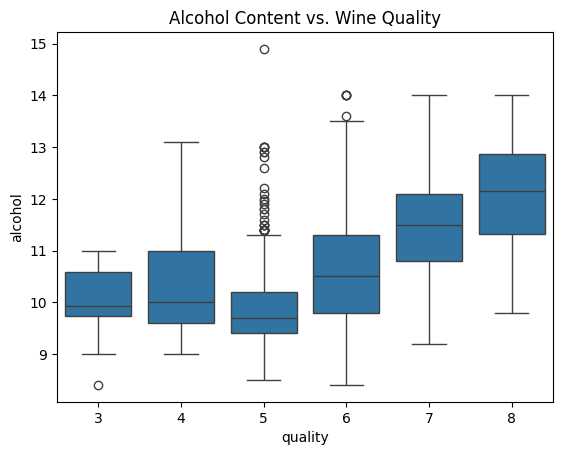

In [6]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol Content vs. Wine Quality")
plt.show()


3. Average residual sugar for best & worst quality wine

In [7]:
best_quality_avg_sugar = df[df['quality'] == max_quality]['residual sugar'].mean()
worst_quality_avg_sugar = df[df['quality'] == min_quality]['residual sugar'].mean()
print(f'Average residual sugar for best quality wine: {best_quality_avg_sugar:.2f}')
print(f'Average residual sugar for worst quality wine: {worst_quality_avg_sugar:.2f}')

Average residual sugar for best quality wine: 2.58
Average residual sugar for worst quality wine: 2.64


4. Volatile acidity impact on quality

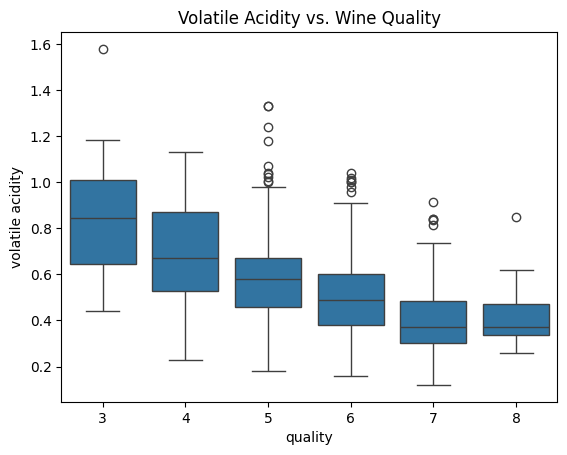

In [8]:
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title("Volatile Acidity vs. Wine Quality")
plt.show()

 5. Train Decision Tree and Random Forest models

In [9]:
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')
print(classification_report(y_test, dt_predictions))

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(classification_report(y_test, rf_predictions))

# Compare performance
print("\nModel Comparison:")
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')


Decision Tree Accuracy: 0.5594
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320

Random Forest Accuracy: 0.6594
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
